In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline 
class Layer:
    def __init__(self,W,b,f):
        self._W = W
        self._b = b
        self._f = f
    def input(self,x):
        return (np.dot(self._W, x) + self._b)
    def forward(self,x):
        return (self._f(np.dot(self._W,x) + self._b))
def sigmoid(u):
    return 1/(1+np.exp(-u))

def d_sigmoid(y):
    return y * (1 - y)

def ReLU(u):
    return u * (u > 0) 

def d_ReLU(y):
    return 1. * (y > 0)

def SE(T,z):
    return np.dot((T - z).T, T - z).flatten()[0]/2

def d_SE(t, y):
    return -(t - y)

def backpropagation(output_data, training_data, input_data, output_layer, input_layer, input_layer_forward_prop):
    delta_output = d_SE(training_data, output_data) * d_sigmoid(output_data)
    delta_input = np.dot(output_layer._W.T, delta_output) * d_sigmoid(input_layer_forward_prop)

    d_W_output = np.dot(delta_output, input_layer_forward_prop.T)
    output_layer._W -= epsilon * d_W_output
    output_layer._b -= epsilon * delta_output

    d_W_input = np.dot(delta_input, input_data.T)
    input_layer._W -= epsilon * d_W_input
    input_layer._b -= epsilon * delta_input

epsilon = 0.1


Training set has 42000 rows and 785 columns
Test set has 28000 rows and 784 columns
(42000, 785)


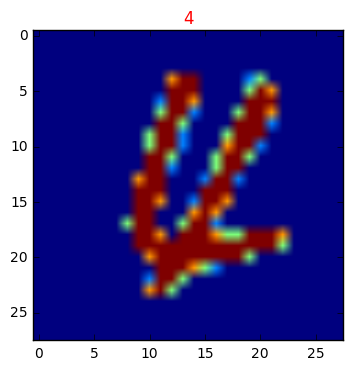

In [5]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
# Write to the log:
print("Training set has {0[0]} rows and {0[1]} columns".format(train.shape))
print("Test set has {0[0]} rows and {0[1]} columns".format(test.shape))
# Any files you write to the current directory get shown as outputs
print (train.shape)
train_shuffle = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
label = train_shuffle.label
train_data = train_shuffle.ix[: , 1: ]
#train_data = train_data.reindex(np.random.permutation(train_data.index)).reset_index(drop=True)
#train_data = train_data.reindex(np.random.permutation(train_data.index))
#.reset_index(drop=True)
#= train_data.reindex(np.random.permutation(train_data.index))
i = 200
a = np.array(train_data[i:i+1]).reshape(28,28)
plt.imshow(a)
plt.title(label[i], color='red')

In [6]:
#encoder dimention
input_dim = 784
hidden1_dim = 100
hidden2_dim = 50
hidden3_dim = 25
hidden4_dim = 10
hidden5_dim = 2
hidden6_dim = 10
hidden7_dim = 25
hidden8_dim = 50
hidden9_dim = 100
output_dim = 784


W1 = np.random.randn(hidden1_dim, input_dim)
b1 = np.random.randn(hidden1_dim, 1)
L1 = Layer(W1, b1, sigmoid)

W2 = np.random.randn(hidden2_dim, hidden1_dim)
b2 = np.random.randn(hidden2_dim, 1)
L2 = Layer(W2, b2, sigmoid)

W3 = np.random.randn(hidden3_dim, hidden2_dim)
b3 = np.random.randn(hidden3_dim, 1)
L3 = Layer(W3, b3, sigmoid)

W4 = np.random.randn(hidden4_dim, hidden3_dim)
b4 = np.random.randn(hidden4_dim, 1)
L4 = Layer(W4, b4, sigmoid)

W5 = np.random.randn(hidden5_dim, hidden4_dim)
b5 = np.random.randn(hidden5_dim, 1)
L5 = Layer(W5, b5, sigmoid)

W6 = np.random.randn(hidden6_dim, hidden5_dim)
b6 = np.random.randn(hidden6_dim, 1)
L6 = Layer(W6, b6, sigmoid)

W7 = np.random.randn(hidden7_dim, hidden6_dim)
b7 = np.random.randn(hidden7_dim, 1)
L7 = Layer(W7, b7, sigmoid)

W8 = np.random.randn(hidden8_dim, hidden7_dim)
b8 = np.random.randn(hidden8_dim, 1)
L8 = Layer(W8, b8, sigmoid)

W9 = np.random.randn(hidden9_dim, hidden8_dim)
b9 = np.random.randn(hidden9_dim, 1)
L9 = Layer(W9, b9, sigmoid)

W10 = np.random.randn(output_dim, hidden9_dim)
b10 = np.random.randn(output_dim, 1)
L10 = Layer(W10, b10, sigmoid)


train_data = train.ix[: , 1: ]
train_data = np.float32(train_data)/255


7.98264783259
7.87720108058
7.33675780796
7.25749152711
7.19739485031
7.03914826426
6.69181943089
6.6104472854
6.54437836396
6.51678507293
6.47772919803
6.40543646295
6.31830218469
6.16120315652
6.10662764632
6.0087929568
5.91277447555
5.81482188825
5.74426904586
5.68205534673



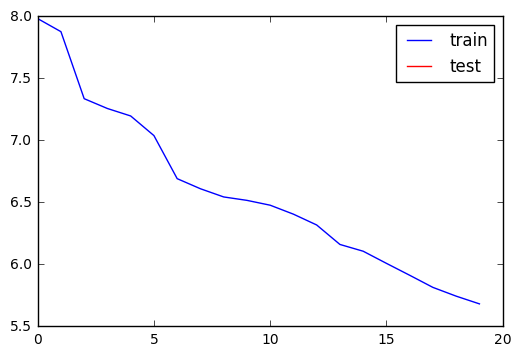

In [113]:

history_train_SE = []
history_test_SE = []
error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255
for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y10 = L10.forward(Y1)
        error += SE(t, Y10)

        #back propagation
        backpropagation(Y10, t, X, L10, L1, Y1)

    error = error/train_len
    print(error)
    history_train_SE.append(error)
    error = 0

plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

1.03110861514
0.662143331074
0.612538239151
0.592882527301
0.579955558838
0.569994691172
0.562428459209
0.557564691475
0.552927553148
0.549549370749
0.545983412902
0.520921966634
0.4994499331
0.494908454345
0.492466413197
0.490585919604
0.488163833046
0.47813676414
0.447982220576
0.442411851594
0.439510423324
0.43825031161
0.436470731372
0.434703637949
0.433481821722
0.43218923004
0.431627650492
0.429048417853
0.428543740276
0.428080910329
0.427143927488
0.4260052123
0.424656958265
0.422757106496
0.421782567496
0.42084238406
0.420295575793
0.418237462753
0.417325131196
0.416710544307



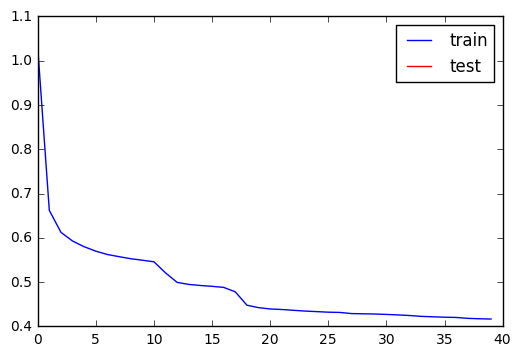

In [114]:

history_train_SE = []
history_test_SE = []
error = 0
train_len = len(train)
epoch = 40
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255
    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y9 = L9.forward(Y2)
        error += SE(Y1, Y9)

        #back propagation

        backpropagation(Y9, Y1, Y1, L9, L2, Y2)

    error = error/train_len
    print(error)
    history_train_SE.append(error)
    error = 0

plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

0.563642932036
0.488897162252
0.480714330902
0.477923573344
0.476170031612
0.475515397449
0.474750426102
0.474486083912
0.474015904382
0.473829410705
0.473592910431
0.473356029468
0.472985941399
0.472800773009
0.472605607525
0.47228408516
0.4720449849
0.471821734992
0.471413139605
0.471056962041



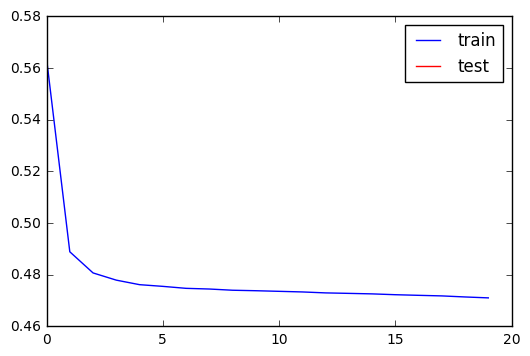

In [155]:

history_train_SE = []
history_test_SE = []
error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255

    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y3 = L3.forward(Y2)
        Y8 = L8.forward(Y3)
        error += SE(Y2, Y8)

        #back propagation

        #backpropagation(Y5, Y1, Y1, L5, L2, Y2)
        backpropagation(Y8, Y2, Y2, L8, L3, Y3)
    error = error/train_len
    print(error)
    history_train_SE.append(error)
    error = 0

plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

0.183116085986
0.17684134682
0.17533065668
0.174875703022
0.174745031995
0.174560032276
0.174494531665
0.174444268614
0.174402542477
0.174382108595
0.174301265274
0.174236662744
0.174262021619
0.174189063231
0.17417451871
0.174155366895
0.174057685799
0.174083583596
0.174069345904
0.17402000421



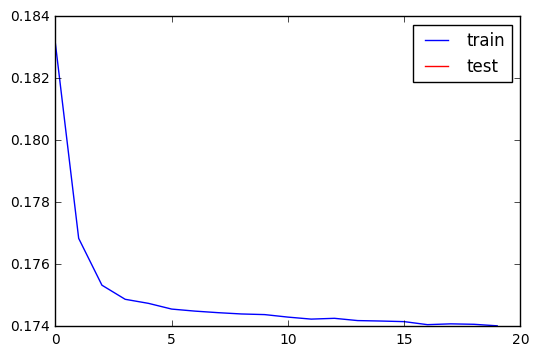

In [156]:

history_train_SE = []
history_test_SE = []
error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255

    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y3 = L3.forward(Y2)
        Y4 = L4.forward(Y3)
        Y7 = L7.forward(Y4)
        error += SE(Y3, Y7)

        #back propagation

        #backpropagation(Y5, Y1, Y1, L5, L2, Y2)
        backpropagation(Y7, Y3, Y3, L7, L4, Y4)
    error = error/train_len
    print(error)
    history_train_SE.append(error)
    error = 0

plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

0.0358816878963
0.0357004650615
0.0355936169572
0.0355336716901
0.0354905171184
0.0354671092239
0.0354560244311
0.0354435091544
0.0354364807984
0.0354236692742
0.0354121773324
0.0354089641893
0.0354060492021
0.0354038696542
0.0354040719946
0.0354003859974
0.0353926473879
0.0353983158437
0.0353922995545
0.0353917161757



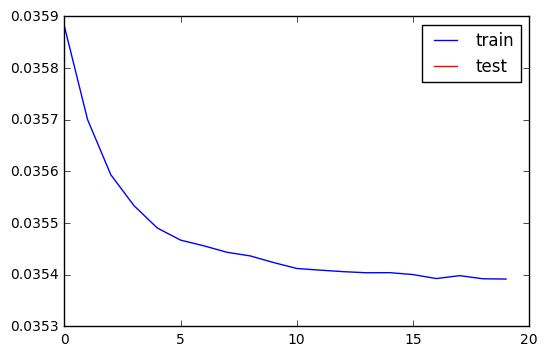

In [157]:

history_train_SE = []
history_test_SE = []
error = 0
train_len = len(train)
epoch = 20
train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
train_data = train_data.ix[: , 1: ]
train_data = np.float32(train_data)/255

for loop in tqdm_notebook(range(epoch)):
    train_data = train.reindex(np.random.permutation(train.index)).reset_index(drop=True)
    train_data = train_data.ix[: , 1: ]
    train_data = np.float32(train_data)/255

    
    for iteration in tqdm_notebook(range(train_len)):
        X = train_data[iteration: iteration+1].reshape(784, 1)
        t = X
        #forward propagation
        Y1 = L1.forward(X)
        Y2 = L2.forward(Y1)
        Y3 = L3.forward(Y2)
        Y4 = L4.forward(Y3)
        Y5 = L5.forward(Y4)
        Y6 = L6.forward(Y5)
        error += SE(Y4, Y6)

        #back propagation

        #backpropagation(Y5, Y1, Y1, L5, L2, Y2)
        backpropagation(Y6, Y4, Y4, L6, L5, Y5)
    error = error/train_len
    print(error)
    history_train_SE.append(error)
    error = 0

plt.plot(range(len(history_train_SE)), history_train_SE, label="train", color="blue")
plt.plot(range(len(history_test_SE)),  history_test_SE,  label="test",  color="red")
plt.legend(loc='upper right')
plt.show()

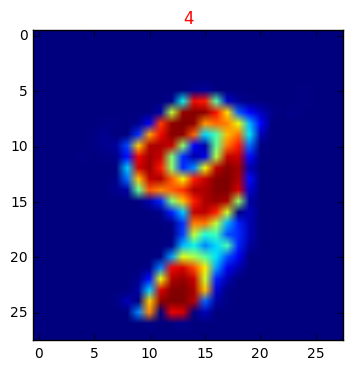

In [190]:
i = 32
#a = np.array(train_data[i:i+1]).reshape(28,28)
#plt.imshow(a)
#plt.title(label[i], color='red')

length = 200
random = np.int(np.random.rand() * length)
x0 = train_data[random: random+1].reshape(784, 1)
t = x0
#t = label[random]
#y1 = L1.forward(x0)
#y2 = L2.forward(y1)
"""
Y1 = L1.forward(x0)
Y2 = L2.forward(Y1)
Y3 = L3.forward(Y2)
Y4 = L4.forward(Y3)
Y5 = L5.forward(Y4)
Y6 = L6.forward(Y5)
a = Y6.reshape(28,28)
"""


Y1 = L1.forward(x0)
Y2 = L2.forward(Y1)
Y3 = L3.forward(Y2)
Y4 = L4.forward(Y3)

Y7 = L7.forward(Y4)
Y8 = L8.forward(Y7)
Y9 = L9.forward(Y8)
Y10 = L10.forward(Y9)

a = Y10.reshape(28,28)


plt.imshow(a)
#plt.show(b)
plt.title(label[random], color='red')

b = np.array(train_data[random: random+1]).reshape(28,28)
#plt.imshow(b)
plt.title(label[random], color='red')
#plt.show(b)

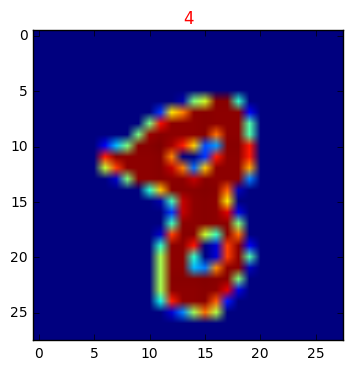

In [191]:
b = np.array(train_data[random: random+1]).reshape(28,28)
plt.imshow(b)
plt.title(label[random], color='red')
#plt.show(b)